[Reference](https://medium.com/@dave.cote.msc/visualization-trick-for-multivariate-regression-problems-5b3aa25ff2f8)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [2]:
# Load data
dataset = load_boston()
X, y = dataset.data, dataset.target
features = dataset.feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [4]:
# Model
model = RandomForestRegressor(n_estimators = 750, max_depth = 5, criterion = 'mae', random_state = 0)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mae', max_depth=5, n_estimators=750,
                      random_state=0)

In [5]:
# Creating the datasets
fit_results = pd.DataFrame(y_train)
fit_results.columns = ['Y_TRUE']
test_pred_results = pd.DataFrame(y_test)
test_pred_results.columns = ['Y_TRUE']

fit_results['Y_FIT'] = model.predict(X_train).ravel()
test_pred_results['Y_PRED'] = model.predict(X_test)

fit_results = fit_results.sort_values(by = ['Y_TRUE']).reset_index(drop = True)
test_pred_results = test_pred_results.sort_values(by = ['Y_TRUE']).reset_index(drop = True)

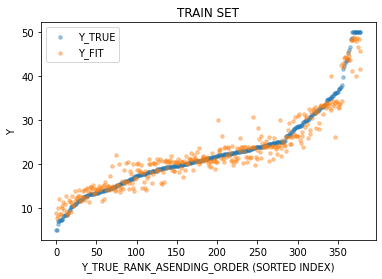

In [6]:
#### SCATTER PLOT - TRAIN
plt.scatter(fit_results.index,  fit_results['Y_TRUE'], alpha = 0.4, s = 12, label = 'Y_TRUE')
plt.scatter(fit_results.index,  fit_results['Y_FIT'], alpha = 0.4, s = 12, label = 'Y_FIT')
plt.xlabel('Y_TRUE_RANK_ASENDING_ORDER (SORTED INDEX)')
plt.ylabel('Y')
plt.title('TRAIN SET')
plt.legend()

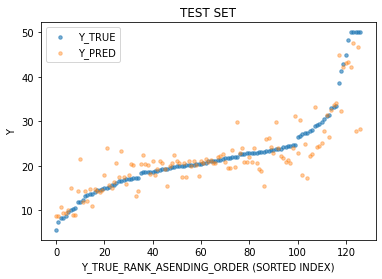

In [7]:
#### SCATTER PLOT - TEST
plt.scatter(test_pred_results.index,  test_pred_results['Y_TRUE'], alpha = 0.6, s = 12, label = 'Y_TRUE')
plt.scatter(test_pred_results.index,  test_pred_results['Y_PRED'], alpha = 0.4, s = 12, label = 'Y_PRED')
plt.xlabel('Y_TRUE_RANK_ASENDING_ORDER (SORTED INDEX)')
plt.ylabel('Y')
plt.title('TEST SET')
plt.legend()

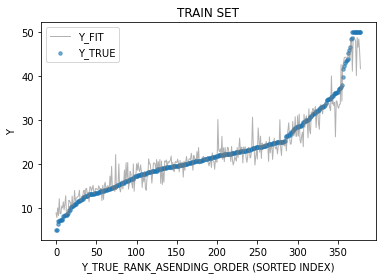

In [8]:
#### LINE PLOT - TRAIN
plt.scatter(fit_results.index,  fit_results['Y_TRUE'], alpha = 0.6, s = 12, label = 'Y_TRUE')
plt.plot(fit_results.index,  fit_results['Y_FIT'], alpha = 0.6, color = 'grey', linewidth = 1, label = 'Y_FIT')
plt.xlabel('Y_TRUE_RANK_ASENDING_ORDER (SORTED INDEX)')
plt.ylabel('Y')
plt.title('TRAIN SET')
plt.legend()

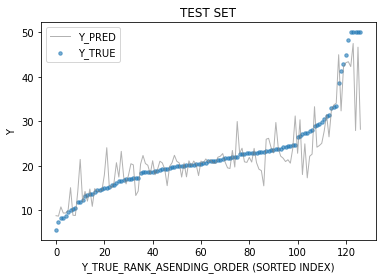

In [9]:
# LINE PLOT - TEST
plt.scatter(test_pred_results.index,  test_pred_results['Y_TRUE'], alpha = 0.6, s = 12, label = 'Y_TRUE')
plt.plot(test_pred_results.index,  test_pred_results['Y_PRED'], alpha = 0.6, color = 'grey', linewidth = 1, label = 'Y_PRED')
plt.xlabel('Y_TRUE_RANK_ASENDING_ORDER (SORTED INDEX)')
plt.ylabel('Y')
plt.title('TEST SET')
plt.legend()

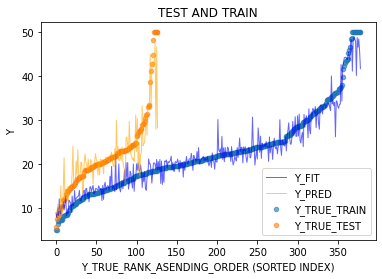

In [10]:
#### TRAIN AND TEST
plt.scatter(fit_results.index,  fit_results['Y_TRUE'], alpha = 0.6, s = 20, label = 'Y_TRUE_TRAIN')
plt.plot(fit_results.index,  fit_results['Y_FIT'], alpha = 0.6, color = 'blue', linewidth = 1, label = 'Y_FIT')
plt.xlabel('Y_TRUE_RANK_ASENDING_ORDER (SORTED INDEX)')
plt.ylabel('Y')
plt.scatter(test_pred_results.index,  test_pred_results['Y_TRUE'], alpha = 0.6, s = 20, label = 'Y_TRUE_TEST')
plt.plot(test_pred_results.index,  test_pred_results['Y_PRED'], alpha = 0.6, color = 'orange', linewidth = 1, label = 'Y_PRED')
plt.title('TEST AND TRAIN')
plt.legend()